# 关键点分析

In [1]:
import pandas as pd
import warnings
import jieba
import re
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import wordcloud
plt.rcParams["font.sans-serif"] = ['SimHei']    #字体指定
plt.rcParams['axes.unicode_minus'] = False      #显示负号，停用减号

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('adjusted_RandomForestClassifier.csv',encoding='UTF-8')

### 切词

In [3]:
zh_pattern = re.compile(u'[\u4e00-\u9fa5]+')
stop_word = [line.strip() for line in open ('chineseStopWords.txt','r').readlines()]
def extract_words(word):
    word = str(word).strip()
    zh_word = re.findall(zh_pattern,word)
    lst = jieba.cut(''.join(zh_word))
    final_word = [char for char in lst if char not in stop_word]
    return ' '.join(final_word) #空格隔开
data_e = df['message'].apply(lambda x:extract_words(x))   #对整列进行操作
data_extract = pd.DataFrame(data_e.values,columns=['content'])  #转换成列表

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\28772\AppData\Local\Temp\jieba.cache
Loading model cost 0.927 seconds.
Prefix dict has been built successfully.


In [4]:
data_extract.head(10)

,content
0,鼠标垫 抠门 扣到 家
1,刚买 两天 降价 多买个 鼠标 保价
2,电脑 刚买 系统 更新
3,不到 十天 降价 厉害
4,刚买 完 降 两百块 钱
5,播放 音乐 声音 时大时 无声
6,刚买 十二天 降 块钱 充电器
7,蹭 退换 还要 检测 工作日内 呵呵
8,变动 建议 入手 斯伍 叉叉
9,买 一个月 闪屏 换 电脑 漏电


In [5]:
df.index = list(range(len(df)))
data_extract.index = list(range(len(data_extract)))
df_all = df[['message', 'predict']].merge(data_extract, right_index=True, left_index=True)
df1 = df_all[(df_all['predict'] == 1)]
df0 = df_all[(df_all['predict'] == 0)]
df_all

,message,predict,content
0,连个鼠标垫都没有，抠门扣到家了,1,鼠标垫 抠门 扣到 家
1,刚买两天就降价，多买个鼠标还不能保价,1,刚买 两天 降价 多买个 鼠标 保价
2,新电脑刚买的 系统更新下 就这样了,1,电脑 刚买 系统 更新
3,还不到十天就降价。厉害,1,不到 十天 降价 厉害
4,刚买完就降了两百块钱,1,刚买 完 降 两百块 钱
...,...,...,...
54995,"第一次买华为电脑,开机很流畅,第一次的开始设置很友好,不用想太多,直接跟着默认设置,很快就把...",0,第一次 买 华为 电脑 开机 流畅 第一次 设置 友好 不用 想太多 跟着 默认设置 很快 ...
54996,电脑运行速度很快，外形好看,0,电脑 运行 速度 很快 外形 好看
54997,笔记本的外观很漂亮，拿到手里很有分量，做工很精细,0,笔记本 外观 很漂亮 拿到 手里 分量 做工 精细
54998,外观很是不错，键盘手感很好,0,外观 不错 键盘 手感 好


### 词频矩阵

In [7]:
vectorizer_pos = CountVectorizer(max_df=0.9,min_df=0.001)  #限制词频
vectorizer_neg = CountVectorizer(max_df=0.9,min_df=0.001)  #限制词频
X_pos = vectorizer_pos.fit_transform(df0.content)
X_neg = vectorizer_neg.fit_transform(df1.content)
vectorizer_neg.get_feature_names()

['一不小心',
 '一个半月',
 '一个多',
 '一个多月',
 '一个月',
 '一个样',
 '一买',
 '一会',
 '一千',
 '一半',
 '一句',
 '一台',
 '一向',
 '一周',
 '一堆',
 '一塌糊涂',
 '一大堆',
 '一批',
 '一星',
 '一条',
 '一枚',
 '一段时间',
 '一点',
 '一看',
 '一般般',
 '一调',
 '一阵',
 '一颗',
 '七千',
 '七天',
 '三个',
 '三包',
 '三天',
 '三星',
 '三次',
 '三百',
 '三百多',
 '上午',
 '上度',
 '上当',
 '上当受骗',
 '上海',
 '上网',
 '上门',
 '下午',
 '下单',
 '下班',
 '下载',
 '下边',
 '不上',
 '不下',
 '不了',
 '不亮',
 '不值',
 '不停',
 '不到',
 '不动',
 '不卡',
 '不发',
 '不响',
 '不回',
 '不太',
 '不太好',
 '不好',
 '不带',
 '不平',
 '不怎么',
 '不怎么样',
 '不想',
 '不敢恭维',
 '不灵敏',
 '不爽',
 '不理',
 '不用',
 '不知',
 '不算',
 '不行',
 '不补',
 '不见',
 '不让',
 '不起',
 '不远处',
 '不送',
 '不通',
 '不配',
 '不错',
 '不顺',
 '专业',
 '专卖店',
 '专员',
 '东莞',
 '东西',
 '东西连',
 '两三次',
 '两三百',
 '两个',
 '两台',
 '两周',
 '两回',
 '两天',
 '两次',
 '两百',
 '两百块',
 '两边',
 '个性',
 '个把月',
 '中午',
 '中心',
 '中毒',
 '为啥',
 '为止',
 '主图',
 '主机',
 '主板',
 '之弈',
 '习惯',
 '买不到',
 '买个',
 '买买',
 '买元',
 '买台',
 '买回来',
 '买来',
 '买贵',
 '买过',
 '事情',
 '二十四',
 '二手货',
 '云顶',
 '五天',
 '五次',
 '产品',
 '产品包装',
 '产品质量',
 '京东',
 '亮度',
 '亮灯',
 

### IDF

In [9]:
tfidf_pos = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_neg = TfidfTransformer(smooth_idf=True,use_idf=True)
Y_pos = tfidf_pos.fit_transform(X_pos)
Y_neg = tfidf_neg.fit_transform(X_neg)
feature_names_pos = vectorizer_pos.get_feature_names()
feature_names_neg = vectorizer_neg.get_feature_names()
df_pos_idf = pd.DataFrame(tfidf_pos.idf_,index=feature_names_pos,columns=["idf_weights"])
df_neg_idf = pd.DataFrame(tfidf_neg.idf_,index=feature_names_neg,columns=["idf_weights"])
df_pos_idf.sort_values(by=['idf_weights'])
df_neg_idf.sort_values(by=['idf_weights'])

,idf_weights
电脑,2.596144
客服,3.361708
降价,3.440893
鼠标,3.491132
不了,3.874593
...,...
数据备份,7.602006
五天,7.602006
救急,7.602006
来说,7.602006


### TF-IDF、统计关键点

In [10]:
tfidf_pos_vector = tfidf_pos.transform(X_pos)
first_document_vector = tfidf_pos_vector[0]
df = pd.DataFrame(first_document_vector.T.todense(),index=feature_names_pos,columns=["tf-idf"])
for i in range(1,tfidf_pos_vector.shape[0]):
    df = df.add(pd.DataFrame(tfidf_pos_vector[i].T.todense(),index=feature_names_pos,columns=["tf-idf"]))
df.sort_values(by=["tf-idf"],ascending=False).to_csv("keypoint_positive.csv")
df.sort_values(by=["tf-idf"],ascending=False).head(30)

,tf-idf
速度,3061.196742
屏幕,2756.415439
运行,2705.235949
不错,2501.501448
外观,2494.419322
轻薄,2429.568502
电脑,2388.659407
散热,2245.391435
效果,2174.586679
很快,2107.382359


In [11]:
tfidf_neg_vector = tfidf_neg.transform(X_neg)
first_document_vector = tfidf_neg_vector[0]
df = pd.DataFrame(first_document_vector.T.todense(),index=feature_names_neg,columns=["tf-idf"])
for i in range(1,tfidf_neg_vector.shape[0]):
    df = df.add(pd.DataFrame(tfidf_neg_vector[i].T.todense(),index=feature_names_neg,columns=["tf-idf"]))
df.sort_values(by=["tf-idf"],ascending=False).to_csv("keypoint_negative.csv")
df.sort_values(by=["tf-idf"],ascending=False).head(30)

,tf-idf
电脑,256.780548
降价,171.896054
鼠标,152.614410
客服,128.750913
垃圾,99.536899
一个月,96.777372
不到,96.530391
评价,96.084798
不了,93.603428
刚买,92.630555


### 积极、消极词语统计

#### 连接情感词典

In [12]:
f = open('情感词典/正面评价词语（中文）.txt')
dic_pos = pd.read_table(f,header=None,encoding='UTF-8',delim_whitespace=True)
f = open('情感词典/负面评价词语（中文）.txt')
dic_neg = pd.read_table(f,header=None,encoding='UTF-8',delim_whitespace=True)
f = open('情感词典/正面情感词语（中文）.txt')
dic_pos = pd.concat([dic_pos,pd.read_table(f,header=None,encoding='UTF-8',delim_whitespace=True)])
f = open('情感词典/负面情感词语（中文）.txt')
dic_neg = pd.concat([dic_neg,pd.read_table(f,header=None,encoding='UTF-8',delim_whitespace=True)])
dic_pos.columns = ['words']
dic_neg.columns = ['words']

In [13]:
dic_neg['word_sentiment'] = 1
dic_pos['word_sentiment'] = 0
dic = pd.concat([dic_neg,dic_pos],ignore_index=1)
dic

,words,word_sentiment
0,中文负面评价词语,1
1,僄,1
2,啰啰唆唆,1
3,啰啰嗦嗦,1
4,啰里啰唆,1
...,...,...
8935,鹄望,0
8936,翊戴,0
8937,裣衽,0
8938,酹,0


#### 词频统计

In [14]:
count_pos = pd.DataFrame()
count_pos['words'] =vectorizer_pos.get_feature_names()
count_pos['count'] =X_pos.toarray().sum(axis=0)
dic_result_pos = pd.merge(count_pos,dic,on=['words'])
dic_result_pos.sort_values(by=["count"],ascending=False).to_csv("dic_result_pos.csv")
dic_result_pos.sort_values(by=["count"],ascending=False).head(30)

,words,count,word_sentiment
165,轻薄,32138,1
8,不错,25149,0
43,喜欢,12615,0
52,好看,10249,0
100,流畅,10239,0
102,清晰,9945,0
103,满意,8884,0
152,舒服,5370,0
153,舒服,5370,0
161,超级,4215,0


In [15]:
count_neg = pd.DataFrame()
count_neg['words'] =vectorizer_neg.get_feature_names()
count_neg['count'] =X_neg.toarray().sum(axis=0)
dic_result_neg = pd.merge(count_neg,dic,on=['words'])
dic_result_neg.sort_values(by=["count"],ascending=False).to_csv("dic_result_neg.csv")
dic_result_neg.sort_values(by=["count"],ascending=False).head(30)

,words,count,word_sentiment
86,系统,169,0
6,不行,155,1
53,支持,96,0
66,活动,87,1
65,没用,85,1
23,后悔,68,1
26,失望,66,1
14,便宜,58,0
7,不错,57,0
37,希望,53,0


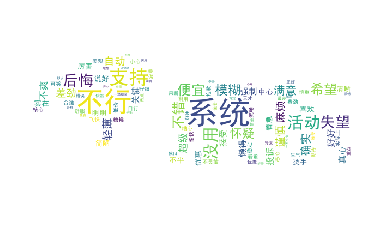

In [23]:
import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 生成词云
frequencies = {}
for index,row in dic_result_neg.iterrows():
    frequencies[row['words']] = int(row['count'])

mask = imageio.imread("mask.jpeg")

wc = WordCloud(
    font_path="./SimHei.ttf",
    max_words=100,
    width=2000,
    height=1200,
    mask=mask,
    background_color='white'
)
word_cloud = wc.generate_from_frequencies(frequencies)
# 写词云图片
word_cloud.to_file("wordcloud_neg.jpg")
# 显示词云文件
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

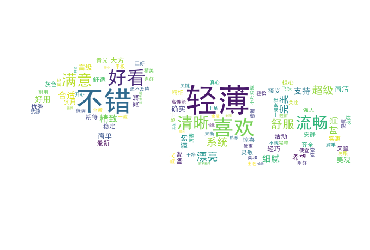

In [24]:
import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 生成词云
frequencies = {}
for index,row in dic_result_pos.iterrows():
    frequencies[row['words']] = int(row['count'])

mask = imageio.imread("mask.jpeg")

wc = WordCloud(
    font_path="./SimHei.ttf",
    max_words=100,
    width=2000,
    height=1200,
    mask=mask,
    background_color='white'
)
word_cloud = wc.generate_from_frequencies(frequencies)
# 写词云图片
word_cloud.to_file("wordcloud_pos.jpg")
# 显示词云文件
plt.imshow(word_cloud)
plt.axis("off")
plt.show()